In [7]:
from glob import glob
import torch
from os import listdir
from os.path import splitext
import logging, librosa
from torch.utils.data import Dataset
import numpy as np
import torch
from matplotlib import cm
from librosa import display
from unet import UNet
import matplotlib.pyplot as plt
from PIL import Image
import scipy.signal as signal
from sklearn import preprocessing
from torch.utils.data import DataLoader, random_split
import torchvision.utils as vutils
import torchvision.transforms as transforms
import os
from itertools import islice

In [221]:
path="/Users/zombie/Downloads/datadrive/ljspeech/wavs/"
revPath="/Users/zombie/Downloads/datadrive/ljspeech/revWavs/"
checkpoint="/Users/zombie/Downloads/datadrive/smallCheckpoint9.5k.pt"

In [222]:
from dataset import TrainDataset

In [224]:
dset=TrainDataset(path, revPath, 16000, 1024, 32, 'hamming', True)
loader=DataLoader(dset, batch_size=8)
i=0
maxs=[]
maxis=[]
for batch in loader:
    print('yes {}'.format(i), end="\r")
    maxs.append(batch[0].max())
    maxis.append(batch[1].max())
    break

In [225]:
batch[0].shape

torch.Size([8, 1, 512, 512])

In [226]:
from unet import UNet
net=UNet(1,1)

In [227]:
ckp=torch.load(checkpoint, map_location='cpu')
net.load_state_dict(ckp['modelStateDict'])

<All keys matched successfully>

In [228]:
out=net(batch[1])

In [237]:
temp1=out[0][0]
# temp1=(temp1*0.5)+0.5
temp=batch[0][0][0]
# temp2=(temp2*0.5)+0.5

In [238]:
import torch.nn as nn
loss=nn.L1Loss()
loss(temp1, temp)

tensor(0.0074, grad_fn=<L1LossBackward>)

In [231]:
temp.detach().numpy().max()-temp.detach().numpy().min()

0.4582387

In [232]:
out.detach().numpy().max()-out.detach().numpy().min()

0.23365425

In [234]:
from skimage import metrics
ssim=metrics.structural_similarity(temp1.detach().numpy(),temp.detach().numpy(), data_range=0.4582)
ssim

0.8751667514870527

In [254]:
mse=nn.MSELoss()
l1=nn.L1Loss()
from skimage import metrics
def SSIM(tensor1, tensor2):
    ssims=0.0
    tensor1=tensor1.contiguous().detach().numpy()
    tensor2=tensor2.contiguous().detach().numpy()
    for idx, batch in enumerate(tensor1):
        range_=batch.max()-batch.min()
        ssims+=metrics.structural_similarity(batch[0], tensor2[idx][0], data_range=range_)
        print(metrics.structural_similarity(tensor2[idx][0], batch[0], data_range=range_))
        print("mse: ", 1-mse(torch.from_numpy(tensor2[idx][0]), torch.from_numpy(batch[0])))
        print("mae: ", 1-l1(torch.from_numpy(tensor2[idx]), torch.from_numpy(batch)))
    return ssims/(idx+1)

In [255]:
1-SSIM(out, batch[0])

0.8812107293860185
mse:  tensor(0.9980)
mae:  tensor(0.9926)
0.8091635230468384
mse:  tensor(0.9994)
mae:  tensor(0.9945)
0.8052909579941832
mse:  tensor(0.9999)
mae:  tensor(0.9976)
0.7751634234728456
mse:  tensor(1.0000)
mae:  tensor(0.9987)
0.8163169370997087
mse:  tensor(1.0000)
mae:  tensor(0.9985)
0.8192878257041367
mse:  tensor(0.9998)
mae:  tensor(0.9972)
0.8112031040878568
mse:  tensor(1.0000)
mae:  tensor(0.9987)
0.7344914671682028
mse:  tensor(0.9999)
mae:  tensor(0.9980)


0.1934840040050262

In [146]:
out.max()-out.min()

tensor(0.2629, grad_fn=<SubBackward0>)

In [191]:
from pytorch_msssim import ssim, ms_ssim

In [162]:
batch[1].max()-batch[1].min()

tensor(0.2396)

In [163]:
ssim(out, batch[1], data_range=0.2396)

tensor(0.8157, grad_fn=<MeanBackward0>)

## 17k temp

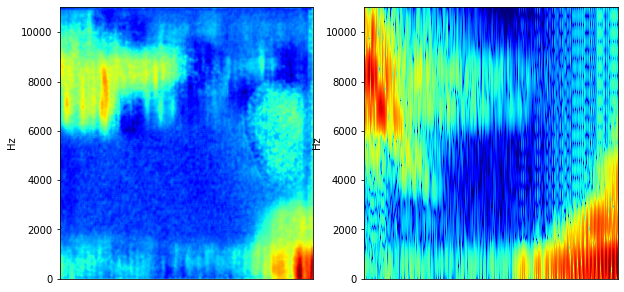

In [220]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

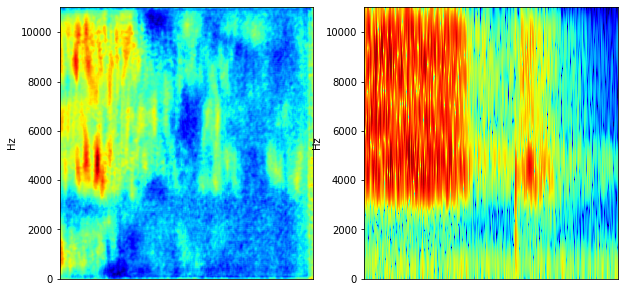

In [189]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## MIXLOSS small 9.5k -seen

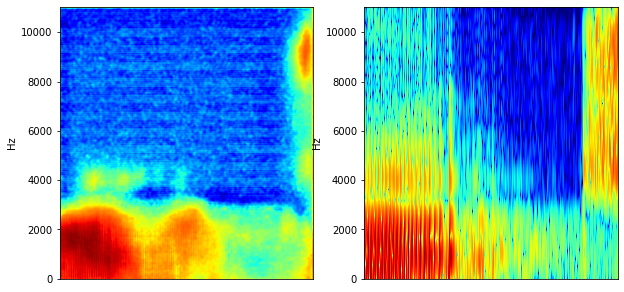

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## MIXLOSS small 8k -seen

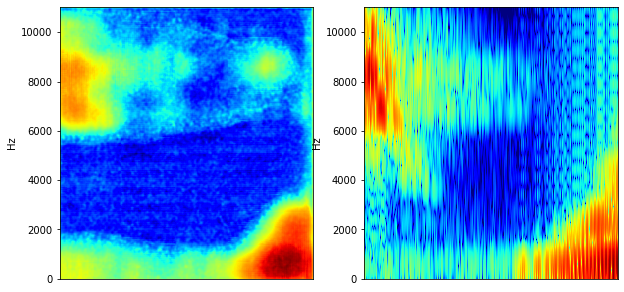

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

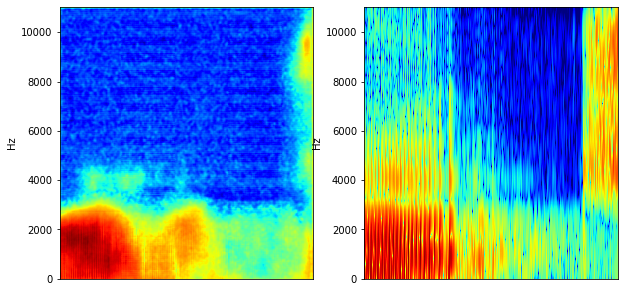

In [62]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## MIXLOSS small 1.5k -seen

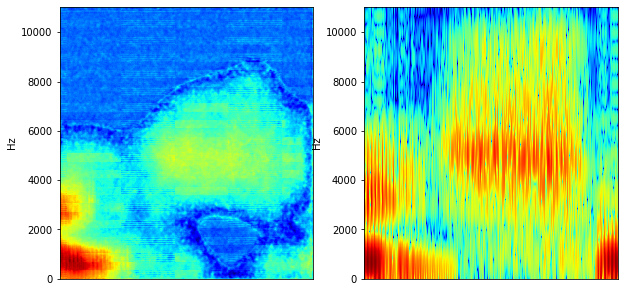

In [40]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## MIXLOSS small 1k -seen

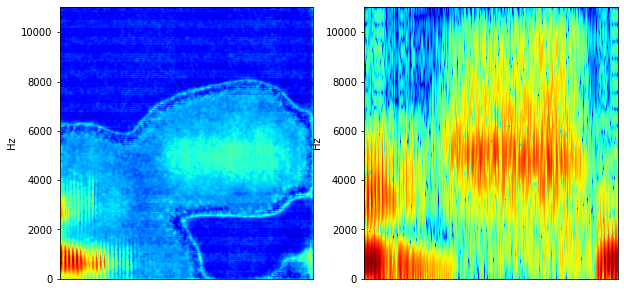

In [32]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)
plt.subplot(1,2,2)
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## MIXLOSS small 1k -unseen

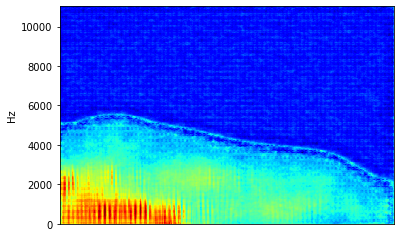

In [17]:
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)

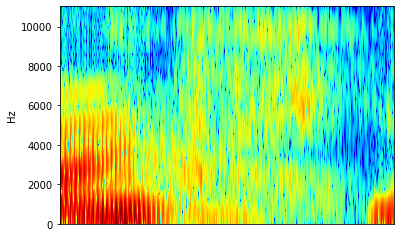

In [18]:
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

## Dice MSE 1k

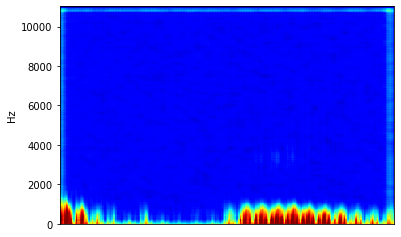

In [39]:
librosa.display.specshow(librosa.power_to_db(temp1.detach().numpy()), y_axis='hz', cmap=cm.jet)

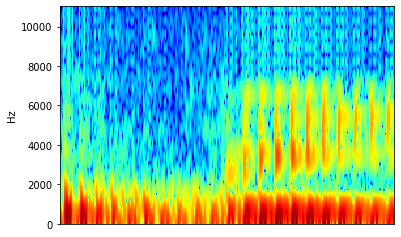

In [40]:
librosa.display.specshow(librosa.power_to_db(temp.detach().numpy()), y_axis='hz', cmap=cm.jet)

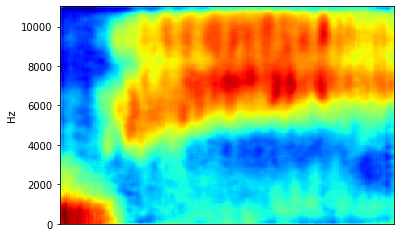

In [17]:
librosa.display.specshow(librosa.power_to_db(out[2][0].detach().numpy()**2), y_axis='hz', cmap=cm.jet)

## 7k

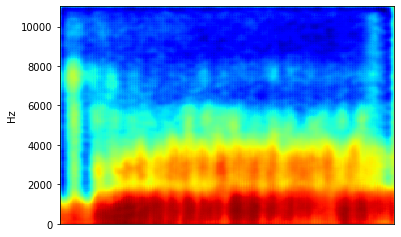

In [44]:
librosa.display.specshow(librosa.power_to_db(out[8][0].detach().numpy()**2), y_axis='hz', cmap=cm.jet)

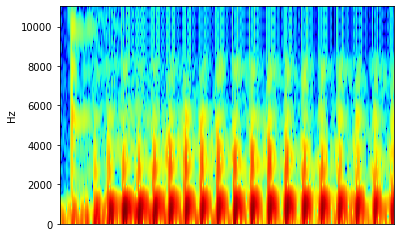

In [43]:
librosa.display.specshow(librosa.power_to_db(batch[0][8][0].numpy()**2), y_axis='hz', cmap=cm.jet)

## Old samples

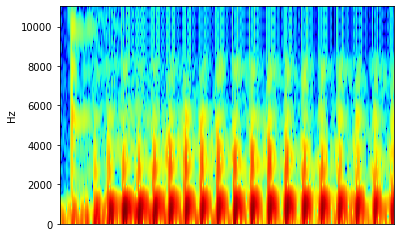

In [32]:
librosa.display.specshow(librosa.power_to_db(batch[0][8][0].numpy()**2), y_axis='hz', cmap=cm.jet)

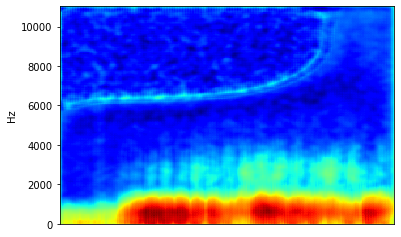

In [33]:
librosa.display.specshow(librosa.power_to_db(out[8][0].detach().numpy()**2), y_axis='hz', cmap=cm.jet)

librosa.display.specshow(out[5][0].detach().numpy(), y_axis='hz', cmap=cm.jet)

In [52]:
# plt.figure(figsize=(8,8))
# plt.axis("off")
# plt.title("Training Images")
# plt.imshow(np.transpose(vutils.make_grid(batch[0][2].to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

<All keys matched successfully>

In [14]:
# net.eval()

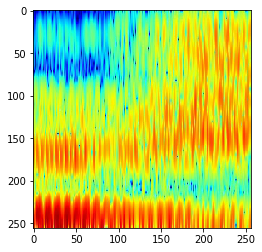

In [28]:
plt.imshow(np.transpose(vutils.make_grid(['reverbed'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

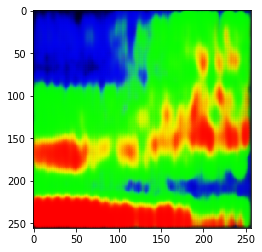

In [29]:
plt.imshow(np.transpose(vutils.make_grid(out[0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

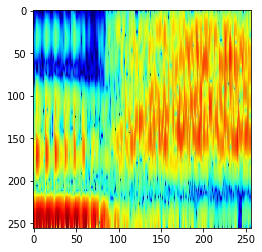

In [30]:
plt.imshow(np.transpose(vutils.make_grid(j['original'][0].detach().to("cpu")[:64], padding=2, normalize=True).cpu(),(1,2,0)))

In [40]:
out[0].shape

torch.Size([3, 256, 256])

In [46]:
temp[2].min()

tensor(-1.)

In [48]:
out[2].min()

tensor(-0.9999, grad_fn=<MinBackward1>)

In [ ]:
def Channel3ToAudio

In [52]:
out[0]

tensor([[[-0.9668, -0.9743, -0.9800,  ..., -0.9599, -0.9571, -0.9578],
         [-0.9750, -0.9833, -0.9884,  ..., -0.9584, -0.9559, -0.9554],
         [-0.9807, -0.9887, -0.9926,  ..., -0.9566, -0.9527, -0.9540],
         ...,
         [-0.1425,  0.3996,  0.7885,  ..., -0.6428, -0.7106, -0.8182],
         [-0.5077, -0.0635,  0.4086,  ..., -0.7175, -0.7885, -0.8675],
         [-0.7734, -0.5851, -0.3075,  ..., -0.8205, -0.8665, -0.9049]],

        [[-0.9579, -0.9770, -0.9876,  ..., -0.7952, -0.7905, -0.8084],
         [-0.9781, -0.9908, -0.9962,  ..., -0.7234, -0.7322, -0.7807],
         [-0.9887, -0.9965, -0.9989,  ..., -0.5927, -0.6340, -0.7354],
         ...,
         [-0.9516, -0.9738, -0.9896,  ...,  0.0054, -0.2917, -0.5737],
         [-0.9376, -0.9574, -0.9792,  ..., -0.2757, -0.4921, -0.6800],
         [-0.9066, -0.9268, -0.9504,  ..., -0.5290, -0.6615, -0.7508]],

        [[-0.4353, -0.4822, -0.5439,  ..., -0.2165, -0.2769, -0.3186],
         [-0.4889, -0.5618, -0.6095,  ..., -0